In [1]:
from IPython.display import display, Image
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import os, warnings
import re

import time

In [2]:
warnings.filterwarnings(action='ignore')
driver = webdriver.Chrome('./chromedriver_90')

url = 'https://coronaboard.kr/'
driver.get(url)
time.sleep(3)

In [3]:
more_button = driver.find_element_by_xpath('//*[@id="show-more"]')

time.sleep(1)
more_button.click()
time.sleep(3)
more_button.click()
time.sleep(3)

In [6]:
list_button = driver.find_element_by_xpath('//*[@id="global-slide"]/div/div[2]/div/div/button/div/div/div')
list_button.click()
time.sleep(1)

list_button.click()
time.sleep(3)

button_1 = driver.find_element_by_xpath('//*[@id="bs-select-1-0"]')
button_1.click()
button_6 = driver.find_element_by_xpath('//*[@id="bs-select-1-5"]')
button_6.click()
time.sleep(2)

list_button.click()
time.sleep(2)

pop_button = driver.find_element_by_xpath('//*[@id="country-table"]/div/div/table/thead/tr/th[10]')
pop_button.click()
time.sleep(1)
pop_button.click()

```
//*[@id="country-table"]/div/div/table/tbody/tr[1]/td[2]
//*[@id="country-table"]/div/div/table/tbody/tr[1]/td[3]
...
//*[@id="country-table"]/div/div/table/tbody/tr[1]/td[10]
...
//*[@id="country-table"]/div/div/table/tbody/tr[2]/td[2]
...
//*[@id="country-table"]/div/div/table/tbody/tr[2]/td[10]
...
```
이런 식으로 가지만 tr을 전체로 하면 열 성분을 모두 가져온다.
```python
column_info = f'//*[@id="country-table"]/div/div/table/tbody/tr/td[{}]'
```

In [7]:
total_info = []

for i in range(2, 11):
    columns = []
    column_xpath = f'//*[@id="country-table"]/div/div/table/tbody/tr/td[{i}]'
    column_info = driver.find_elements_by_xpath(column_xpath)

    for one in column_info:
        columns.append(one.text)

    total_info.append(columns)
    
print(total_info)

[['중국🇨🇳', '인도🇮🇳', '미국🇺🇸', '인도네시아🇮🇩', '파키스탄🇵🇰', '브라질🇧🇷', '나이지리아🇳🇬', '방글라데시🇧🇩', '러시아🇷🇺', '멕시코🇲🇽', '일본🇯🇵*', '에티오피아🇪🇹', '필리핀🇵🇭', '이집트🇪🇬', '베트남🇻🇳', '콩고민주공화국🇨🇩', '터키🇹🇷', '이란🇮🇷', '독일🇩🇪', '태국🇹🇭', '영국🇬🇧', '프랑스🇫🇷', '이탈리아🇮🇹', '탄자니아🇹🇿', '남아프리카 공화국🇿🇦', '미얀마🇲🇲', '케냐🇰🇪', '대한민국🇰🇷', '콜롬비아🇨🇴', '스페인🇪🇸', '우간다🇺🇬', '아르헨티나🇦🇷', '알제리🇩🇿', '수단🇸🇩', '우크라이나🇺🇦', '이라크🇮🇶', '아프가니스탄🇦🇫', '폴란드🇵🇱', '캐나다🇨🇦', '모로코🇲🇦', '사우디아라비아🇸🇦', '우즈베키스탄🇺🇿', '페루🇵🇪', '앙골라🇦🇴', '말레이시아🇲🇾', '모잠비크🇲🇿', '가나🇬🇭', '예멘🇾🇪', '네팔🇳🇵', '베네수엘라🇻🇪', '마다가스카르🇲🇬', '카메룬🇨🇲', '코트디부아르🇨🇮', '호주🇦🇺', '니제르🇳🇪', '대만🇹🇼', '스리랑카🇱🇰', '부르키나파소🇧🇫', '말리🇲🇱', '루마니아🇷🇴', '말라위🇲🇼', '칠레🇨🇱', '카자흐스탄🇰🇿', '잠비아🇿🇲', '과테말라🇬🇹', '에콰도르🇪🇨', '시리아🇸🇾', '네덜란드🇳🇱', '세네갈🇸🇳', '캄보디아🇰🇭', '차드🇹🇩', '소말리아🇸🇴', '짐바브웨🇿🇼', '기니🇬🇳', '르완다🇷🇼', '베냉🇧🇯', '부룬디🇧🇮', '튀니지🇹🇳', '볼리비아🇧🇴', '벨기에🇧🇪', '아이티🇭🇹', '쿠바🇨🇺', '남수단🇸🇸', '도미니카 공화국🇩🇴', '체코🇨🇿', '그리스🇬🇷', '요르단🇯🇴', '포르투갈🇵🇹', '아제르바이잔🇦🇿', '스웨덴🇸🇪', '온두라스🇭🇳', '아랍에미레이트🇦🇪', '헝가리🇭🇺', '타지키스탄🇹🇯', '벨라루스🇧🇾', '오스트리아🇦🇹', '파푸아뉴기니🇵🇬', '세르비아🇷🇸', '이스라엘🇮🇱', '스위스🇨🇭', '토고🇹🇬', '시에라리온🇸🇱', '홍콩🇭🇰', '라오스🇱🇦',

In [8]:
## 이 코드는 꼭 한번만 실행해야함!!
## 이 코드는 꼭 한번만 실행해야함!!
for idx, one in enumerate(total_info[0]):
    total_info[0][idx] = one[:-2]

total_info[0][10] = total_info[0][10][:-1]

total_info[0]

['중국',
 '인도',
 '미국',
 '인도네시아',
 '파키스탄',
 '브라질',
 '나이지리아',
 '방글라데시',
 '러시아',
 '멕시코',
 '일본',
 '에티오피아',
 '필리핀',
 '이집트',
 '베트남',
 '콩고민주공화국',
 '터키',
 '이란',
 '독일',
 '태국',
 '영국',
 '프랑스',
 '이탈리아',
 '탄자니아',
 '남아프리카 공화국',
 '미얀마',
 '케냐',
 '대한민국',
 '콜롬비아',
 '스페인',
 '우간다',
 '아르헨티나',
 '알제리',
 '수단',
 '우크라이나',
 '이라크',
 '아프가니스탄',
 '폴란드',
 '캐나다',
 '모로코',
 '사우디아라비아',
 '우즈베키스탄',
 '페루',
 '앙골라',
 '말레이시아',
 '모잠비크',
 '가나',
 '예멘',
 '네팔',
 '베네수엘라',
 '마다가스카르',
 '카메룬',
 '코트디부아르',
 '호주',
 '니제르',
 '대만',
 '스리랑카',
 '부르키나파소',
 '말리',
 '루마니아',
 '말라위',
 '칠레',
 '카자흐스탄',
 '잠비아',
 '과테말라',
 '에콰도르',
 '시리아',
 '네덜란드',
 '세네갈',
 '캄보디아',
 '차드',
 '소말리아',
 '짐바브웨',
 '기니',
 '르완다',
 '베냉',
 '부룬디',
 '튀니지',
 '볼리비아',
 '벨기에',
 '아이티',
 '쿠바',
 '남수단',
 '도미니카 공화국',
 '체코',
 '그리스',
 '요르단',
 '포르투갈',
 '아제르바이잔',
 '스웨덴',
 '온두라스',
 '아랍에미레이트',
 '헝가리',
 '타지키스탄',
 '벨라루스',
 '오스트리아',
 '파푸아뉴기니',
 '세르비아',
 '이스라엘',
 '스위스',
 '토고',
 '시에라리온',
 '홍콩',
 '라오스',
 '파라과이',
 '불가리아',
 '리비아',
 '레바논',
 '니카라과',
 '키르기스스탄',
 '엘살바도르',
 '싱가포르',
 '덴마크',
 '핀란드',
 '콩고공화국',
 '슬로바키아

In [9]:
driver = webdriver.Chrome('./chromedriver_90')
url = 'https://namu.wiki/w/%EA%B5%AD%EA%B0%80%EB%B3%84%20%EA%B5%AD%ED%86%A0%20%EB%A9%B4%EC%A0%81%20%EC%88%9C%EC%9C%84'
driver.get(url)

time.sleep(2)

page = driver.page_source
soup = BeautifulSoup(page, 'lxml')

Results = []
Orders = []
Countries = []
Land = []

table = soup.find('table', class_='wiki-table')
table_list = table.findAll('td')
for idx, one in enumerate(table_list):
#     print(idx, ')', one.text.strip().split('\n'))
    Results += one.text.strip().split('\n')
    
len_R = len(Results)

for i in range(4, len_R+1, 4):
    Orders.append(Results[i])
for i in range(5, len_R+1, 4):
    Countries.append(Results[i])
for i in range(6, len_R+1, 4):
    Land.append(Results[i])
    
    
print(len(Orders))
print(len(Countries))
print(len(Land))

282
282
282


In [10]:
land_idx = []
land_list = []

for natl in total_info[0][:91]:
    for idx, one in enumerate(Countries):
        if natl == one:
            land_idx.append(idx)
            
# print(land_idx)
for i in land_idx:
    land_list.append(Land[i])
    
land_list

['9,640,821',
 '3,287,263',
 '9,833,517',
 '1,904,569',
 '796,095',
 '8,515,770',
 '923,768',
 '143,998',
 '17,125,407',
 '1,964,375',
 '377,975',
 '1,104,300',
 '300,000',
 '1,010,408',
 '331,210',
 '2,344,858',
 '783,356',
 '1,648,195',
 '357,022',
 '513,120',
 '243,610',
 '640,679',
 '301,340',
 '947,303',
 '1,219,090',
 '676,578',
 '580,367',
 '100,412',
 '1,138,914',
 '505,990',
 '241,038',
 '2,780,400',
 '2,381,741',
 '1,861,484',
 '603,628',
 '438,317',
 '652,230',
 '312,685',
 '9,984,670',
 '446,550',
 '2,149,690',
 '447,400',
 '1,285,216',
 '1,246,700',
 '329,847',
 '801,590',
 '238,533',
 '527,968',
 '147,516',
 '912,050',
 '587,041',
 '475,440',
 '322,463',
 '7,741,220',
 '1,267,000',
 '36,197',
 '65,610',
 '274,200',
 '1,240,192',
 '238,391',
 '118,484',
 '756,096',
 '2,724,900',
 '752,618',
 '108,889',
 '283,561',
 '185,180',
 '41,543',
 '196,722',
 '181,035',
 '1,284,000',
 '637,657',
 '390,757',
 '245,857',
 '26,338',
 '112,622',
 '27,834',
 '163,610',
 '1,098,581',
 '30

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 90개국 출력
dict_dat = { "국가":total_info[0][:91], 
             "확진자":total_info[1][:91],
             "치료중":total_info[2][:91],
             "사망자":total_info[3][:91],
             "완치":total_info[4][:91], 
             "치명(%)":total_info[5][:91],
             "완치(%)":total_info[6][:91],
             "발생률":total_info[7][:91], 
             "인구수":total_info[8][:91], 
             "국토면적":land_list}

dict_dat = pd.DataFrame(dict_dat)
dict_dat

국가                    확진자                   치료중                사망자  \
0          중국          91,653\n(+24)             514\n(+2)              4,636   
1          인도  30,028,709\n(+26,018)    643,163\n(-19,141)  390,691\n(+1,030)   
2          미국  34,434,803\n(+14,822)  4,999,794\n(-34,296)    617,875\n(+392)   
3       인도네시아              2,018,113               152,686             55,291   
4        파키스탄        950,768\n(+930)        33,005\n(-447)      22,073\n(+39)   
5         브라질  18,056,639\n(+86,833)  1,162,895\n(-15,702)  504,897\n(+2,080)   
6       나이지리아         167,331\n(+39)          1,300\n(-77)              2,118   
7       방글라데시                861,150                59,063             13,702   
8         러시아              5,350,919               331,122            130,347   
9         멕시코    2,482,784\n(+4,233)     274,208\n(+1,156)    231,505\n(+261)   
10         일본                785,969                22,248             14,439   
11      에티오피아         275,391\n(+73)        15,139\n(-391)        4,290\n(+4)   
12        필리핀              1,367,894                52,696             23,809   
13        이집트        278,295\n(+498)        55,508\n(-338)      15,935\n(+37)   
14        베트남         13,862\n(+232)         8,247\n(+139)                 69   
15    콩고민주공화국                 38,330                 9,473                888   
16         터키    5,381,736\n(+6,143)        89,498\n(+872)      49,293\n(+57)   
17         이란              3,117,336               262,414             83,217   
18         독일      3,731,287\n(+513)      28,705\n(-2,944)      91,082\n(+57)   
19         태국      228,539\n(+3,174)      37,018\n(+1,182)       1,744\n(+51)   
20         영국   4,651,988\n(+11,481)     217,498\n(+8,968)     128,008\n(+27)   
21        프랑스    5,760,002\n(+2,204)      74,087\n(-6,539)     110,829\n(+51)   
22       이탈리아      4,254,294\n(+834)      72,964\n(-3,889)     127,322\n(+31)   
23       탄자니아                    509                   305                 21   
24  남아프리카 공화국   1,843,572\n(+11,093)     118,940\n(+1,936)     59,092\n(+297)   
25        미얀마        149,247\n(+630)        12,087\n(+488)        3,267\n(+2)   
26         케냐        179,876\n(+583)        53,342\n(+475)       3,484\n(+23)   
27       대한민국        152,545\n(+645)          6,159\n(+82)        2,007\n(+1)   
28       콜롬비아   3,997,021\n(+28,616)     180,757\n(-1,119)    101,302\n(+720)   
29        스페인    3,768,691\n(+4,040)       123,122\n(-806)      80,719\n(+30)   
30        우간다         73,401\n(+722)        22,602\n(+397)         714\n(+34)   
31      아르헨티나   4,298,782\n(+21,387)     280,112\n(+3,042)     90,281\n(+791)   
32        알제리        136,679\n(+385)        37,945\n(+114)        3,650\n(+9)   
33         수단         36,522\n(+175)         3,404\n(-144)       2,748\n(+11)   
34      우크라이나      2,230,977\n(+835)      23,593\n(-1,527)      52,123\n(+70)   
35        이라크              1,298,703                71,850             16,935   
36     아프가니스탄                107,957                38,026              4,366   
37        폴란드              2,879,030               153,399             74,858   
38        캐나다      1,410,206\n(+599)        10,162\n(-870)      26,155\n(+71)   
39        모로코        527,174\n(+437)          3,648\n(+53)        9,247\n(+3)   
40    사우디아라비아      476,882\n(+1,479)        11,143\n(+559)              7,691   
41     우즈베키스탄        107,266\n(+419)         3,470\n(-111)          722\n(+2)   
42         페루    2,033,606\n(+2,995)                   N/A    190,906\n(+261)   
43        앙골라         37,874\n(+126)         4,996\n(-102)          875\n(+7)   
44      말레이시아                705,762                62,027              4,554   
45       모잠비크         72,775\n(+198)         1,634\n(+146)          852\n(+4)   
46         가나         95,236\n(+177)          1,301\n(+41)                794   
47         예멘            6,892\n(+3)          1,557\n(-19)              1,355   
48         네팔                626,343      

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib
import os, warnings
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df1 = pd.read_csv('today_corona_edit .csv',encoding='euc-kr')
df2 = pd.read_csv('Natl_GDP.csv',encoding='euc-kr')

df1

국가       확진자        치료중     사망자          완치  치명(%)  완치(%)     발생률  \
0          중국     91629      512.0    4636     86481.0      5   94.0      64   
1          인도  29977861   662521.0  389302  28926038.0      1   97.0   21723   
2          미국  34419838  5034868.0  617463  28767507.0      2   84.0  103987   
3       인도네시아   2004445   147728.0   54956   1801761.0      3   90.0    7328   
4        파키스탄    949838    33452.0   22034    894352.0      2   94.0    4300   
5         브라질  17969806  1178597.0  502817  16288392.0      3   91.0   84540   
6       나이지리아    167292     1377.0    2118    163797.0      1   98.0     812   
7       방글라데시    856304    57196.0   13626    785482.0      2   92.0    5200   
8         러시아   5334204   326070.0  129801   4878333.0      2   92.0   36552   
9         멕시코   2478551   273052.0  231244   1974255.0      9   80.0   19224   
10         일본    785969    22248.0   14439    749282.0      2   95.0    6214   
11      에티오피아    275318    15530.0    4286    255502.0      2   93.0    2395   
12        필리핀   1364239    55847.0   23749   1284643.0      2   94.0   12450   
13        이집트    277797    55846.0   15898    206053.0      6   74.0    2715   
14        베트남     13530     8008.0      69      5453.0      1   40.0     139   
15    콩고민주공화국     37926     9109.0     879     27938.0      2   74.0     423   
16         터키   5375593    88626.0   49236   5237731.0      1   97.0   63738   
17         이란   3105620   262290.0   83101   2760229.0      3   89.0   36975   
18         독일   3730599    31492.0   91007   3608100.0      2   97.0   44526   
19         태국    225365    35836.0    1693    187836.0      1   83.0    3229   
20         영국   4640507   208530.0  127981   4303996.0      3   93.0   68357   
21        프랑스   5757798    80626.0  110778   5566394.0      2   97.0   88210   
22       이탈리아   4253460    76853.0  127291   4049316.0      3   95.0   70350   
23       탄자니아       509      305.0      21       183.0      4   36.0       9   
24  남아프리카 공화국   1832479   117004.0   58795   1656680.0      3   90.0   30897   
25        미얀마    148617    11599.0    3265    133753.0      2   90.0    2731   
26         케냐    179293    52867.0    3461    122965.0      2   69.0    3334   
27       대한민국    151901     6078.0    2006    143817.0      1   95.0    2963   
28       콜롬비아   3968405   181876.0  100582   3685947.0      3   93.0   77991   
29        스페인   3764651   123928.0   80689   3560034.0      2   95.0   80519   
30        우간다     72679    22205.0     680     49794.0      1   69.0    1589   
31      아르헨티나   4277395   277070.0   89490   3910835.0      2   91.0   94641   
32        알제리    136294    37831.0    3641     94822.0      3   70.0    3108   
33         수단     36347     3548.0    2737     30062.0      8   83.0     829   
34      우크라이나   2229846    25674.0   52032   2152140.0      2   97.0   50987   
35        이라크   1292700    70911.0   16910   1204879.0      1   93.0   32139   
36     아프가니스탄    105755    36391.0    4293     65071.0      4   62.0    2717   
37        폴란드   2878840   153363.0   74829   2650648.0      3   92.0   76066   
38        캐나다   1409607    11032.0   26084   1372491.0      2   97.0   37348   
39        모로코    526737     3595.0    9244    513898.0      2   98.0   14271   
40    사우디아라비아    475403    10584.0    7691    457128.0      2   96.0   13656   
41     우즈베키스탄    106452     3571.0     718    102163.0      1   96.0    3181   
42         페루   2030611        NaN  190645         NaN      9    NaN   61586   
43        앙골라     37748     5098.0     868     31782.0      2   84.0    1149   
44      말레이시아    701019    62918.0    4477    633624.0      1   90.0   21659   
45       모잠비크     72577     1488.0     848     70241.0      1   97.0    2322   
46         가나     95059     1260.0     794     93005.0      1   98.0    3059   
47         예멘      6889     1576.0    1355      3958.0     20   58.0     231   
48         네팔    622640    53940.0    8772    559928.0      1   90.0   21370   
49      베네수

In [16]:
df2[['국가', '2021']]

국가       2021
0          가나      74.26
1        과테말라     81.402
2         그리스    209.857
3          기니     16.339
4       나이지리아    514.049
5         남수단      4.461
6   남아프리카 공화국    329.529
7        네덜란드   1012.598
8          네팔     36.084
9         니제르     15.899
10         대만    759.104
11       대한민국   1806.707
12   도미니카 공화국     83.917
13         독일   4319.286
14        러시아   1710.734
15       루마니아     289.13
16        르완다     10.633
17     마다가스카르     14.746
18        말라위      9.268
19      말레이시아    387.093
20         말리     19.912
21        멕시코    1192.48
22        모로코    124.003
23       모잠비크     13.957
24         미국  22675.271
25        미얀마     76.195
26      방글라데시    352.908
27         베냉     17.327
28      베네수엘라      42.53
29        베트남    354.868
30        벨기에    578.996
31       볼리비아      43.11
32        부룬디      3.244
33     부르키나파소     18.853
34        브라질   1491.772
35    사우디아라비아    804.921
36        세네갈     27.927
37       소말리아      5.367
38         수단     35.827
39       스리랑카     84.532
40        스웨덴    625.948
41        스페인   1461.552
42        시리아    no data
43      아르헨티나     418.15
44        아이티     22.431
45     아제르바이젠     49.914
46     아프가니스탄     19.938
47        알제리    151.459
48        앙골라     66.493
49       에콰도르    100.595
50      에티오피아     93.966
51         영국    3124.65
52         예멘     25.095
53       온두라스     26.161
54        요르단     44.979
55        우간다     41.271
56     우즈베키스탄     61.203
57      우크라이나    164.593
58        이라크    190.733
59         이란    682.859
60        이집트    394.284
61       이탈리아   2106.287
62         인도   3049.704
63      인도네시아   1158.783
64         일본   5378.136
65        잠비아     18.955
66         중국  16642.318
67       짐바브웨     26.085
68         차드     12.531
69         체코    276.109
70         칠레    307.938
71        카메룬     44.893
72      카자흐스탄    187.836
73       캄보디아     27.239
74        캐나다   1883.487
75         케냐    106.041
76     코트디부아르     70.991
77       콜롬비아     295.61
78    콩고민주공화국     12.022
79       탄자니아     65.919
80         태국    538.735
81         터키     794.53
82        튀니지     44.265
83       파키스탄    no data
84         페루    225.918
85       포르투갈    257.391
86        폴란드    642.121
87        프랑스   2938.271
88        필리핀    402.638
89         호주   1617.543

In [17]:
target = list(df1['국가'])
country = list(df2['국가'])

gdp = list(df2['2021'])
idx_list = []
new_cty = []
gdp_list = []

for i in target:
    for idx, one in enumerate(country):
        if i == one:
            idx_list.append(idx)
        
for i in idx_list:
    new_cty.append(country[i])
    gdp_list.append(gdp[i])

gdp_list = pd.DataFrame(gdp_list)
df1['GDP'] = gdp_list

df1

국가       확진자        치료중     사망자          완치  치명(%)  완치(%)     발생률  \
0          중국     91629      512.0    4636     86481.0      5   94.0      64   
1          인도  29977861   662521.0  389302  28926038.0      1   97.0   21723   
2          미국  34419838  5034868.0  617463  28767507.0      2   84.0  103987   
3       인도네시아   2004445   147728.0   54956   1801761.0      3   90.0    7328   
4        파키스탄    949838    33452.0   22034    894352.0      2   94.0    4300   
5         브라질  17969806  1178597.0  502817  16288392.0      3   91.0   84540   
6       나이지리아    167292     1377.0    2118    163797.0      1   98.0     812   
7       방글라데시    856304    57196.0   13626    785482.0      2   92.0    5200   
8         러시아   5334204   326070.0  129801   4878333.0      2   92.0   36552   
9         멕시코   2478551   273052.0  231244   1974255.0      9   80.0   19224   
10         일본    785969    22248.0   14439    749282.0      2   95.0    6214   
11      에티오피아    275318    15530.0    4286    255502.0      2   93.0    2395   
12        필리핀   1364239    55847.0   23749   1284643.0      2   94.0   12450   
13        이집트    277797    55846.0   15898    206053.0      6   74.0    2715   
14        베트남     13530     8008.0      69      5453.0      1   40.0     139   
15    콩고민주공화국     37926     9109.0     879     27938.0      2   74.0     423   
16         터키   5375593    88626.0   49236   5237731.0      1   97.0   63738   
17         이란   3105620   262290.0   83101   2760229.0      3   89.0   36975   
18         독일   3730599    31492.0   91007   3608100.0      2   97.0   44526   
19         태국    225365    35836.0    1693    187836.0      1   83.0    3229   
20         영국   4640507   208530.0  127981   4303996.0      3   93.0   68357   
21        프랑스   5757798    80626.0  110778   5566394.0      2   97.0   88210   
22       이탈리아   4253460    76853.0  127291   4049316.0      3   95.0   70350   
23       탄자니아       509      305.0      21       183.0      4   36.0       9   
24  남아프리카 공화국   1832479   117004.0   58795   1656680.0      3   90.0   30897   
25        미얀마    148617    11599.0    3265    133753.0      2   90.0    2731   
26         케냐    179293    52867.0    3461    122965.0      2   69.0    3334   
27       대한민국    151901     6078.0    2006    143817.0      1   95.0    2963   
28       콜롬비아   3968405   181876.0  100582   3685947.0      3   93.0   77991   
29        스페인   3764651   123928.0   80689   3560034.0      2   95.0   80519   
30        우간다     72679    22205.0     680     49794.0      1   69.0    1589   
31      아르헨티나   4277395   277070.0   89490   3910835.0      2   91.0   94641   
32        알제리    136294    37831.0    3641     94822.0      3   70.0    3108   
33         수단     36347     3548.0    2737     30062.0      8   83.0     829   
34      우크라이나   2229846    25674.0   52032   2152140.0      2   97.0   50987   
35        이라크   1292700    70911.0   16910   1204879.0      1   93.0   32139   
36     아프가니스탄    105755    36391.0    4293     65071.0      4   62.0    2717   
37        폴란드   2878840   153363.0   74829   2650648.0      3   92.0   76066   
38        캐나다   1409607    11032.0   26084   1372491.0      2   97.0   37348   
39        모로코    526737     3595.0    9244    513898.0      2   98.0   14271   
40    사우디아라비아    475403    10584.0    7691    457128.0      2   96.0   13656   
41     우즈베키스탄    106452     3571.0     718    102163.0      1   96.0    3181   
42         페루   2030611        NaN  190645         NaN      9    NaN   61586   
43        앙골라     37748     5098.0     868     31782.0      2   84.0    1149   
44      말레이시아    701019    62918.0    4477    633624.0      1   90.0   21659   
45       모잠비크     72577     1488.0     848     70241.0      1   97.0    2322   
46         가나     95059     1260.0     794     93005.0      1   98.0    3059   
47         예멘      6889     1576.0    1355      3958.0     20   58.0     231   
48         네팔    622640    53940.0    8772    559928.0      1   90.0   21370   
49      베네수

In [18]:
df1.sort_values(by='확진자', ascending=False)

국가       확진자        치료중     사망자          완치  치명(%)  완치(%)     발생률  \
2          미국  34419838  5034868.0  617463  28767507.0      2   84.0  103987   
1          인도  29977861   662521.0  389302  28926038.0      1   97.0   21723   
5         브라질  17969806  1178597.0  502817  16288392.0      3   91.0   84540   
21        프랑스   5757798    80626.0  110778   5566394.0      2   97.0   88210   
16         터키   5375593    88626.0   49236   5237731.0      1   97.0   63738   
8         러시아   5334204   326070.0  129801   4878333.0      2   92.0   36552   
20         영국   4640507   208530.0  127981   4303996.0      3   93.0   68357   
31      아르헨티나   4277395   277070.0   89490   3910835.0      2   91.0   94641   
22       이탈리아   4253460    76853.0  127291   4049316.0      3   95.0   70350   
28       콜롬비아   3968405   181876.0  100582   3685947.0      3   93.0   77991   
29        스페인   3764651   123928.0   80689   3560034.0      2   95.0   80519   
18         독일   3730599    31492.0   91007   3608100.0      2   97.0   44526   
17         이란   3105620   262290.0   83101   2760229.0      3   89.0   36975   
37        폴란드   2878840   153363.0   74829   2650648.0      3   92.0   76066   
9         멕시코   2478551   273052.0  231244   1974255.0      9   80.0   19224   
34      우크라이나   2229846    25674.0   52032   2152140.0      2   97.0   50987   
42         페루   2030611        NaN  190645         NaN      9    NaN   61586   
3       인도네시아   2004445   147728.0   54956   1801761.0      3   90.0    7328   
24  남아프리카 공화국   1832479   117004.0   58795   1656680.0      3   90.0   30897   
67       네덜란드   1679542        NaN   17727         NaN      1    NaN   98019   
84         체코   1666082     2640.0   30280   1633162.0      2   98.0  155578   
61         칠레   1522223    38470.0   31645   1452108.0      2   95.0   79630   
38        캐나다   1409607    11032.0   26084   1372491.0      2   97.0   37348   
12        필리핀   1364239    55847.0   23749   1284643.0      2   94.0   12450   
35        이라크   1292700    70911.0   16910   1204879.0      1   93.0   32139   
89        스웨덴   1084636        NaN   14537         NaN      1    NaN  107398   
59       루마니아   1080282     2684.0   32391   1045207.0      3   97.0   56154   
79        벨기에   1079640    37925.0   25141   1016574.0      2   94.0   93156   
4        파키스탄    949838    33452.0   22034    894352.0      2   94.0    4300   
87       포르투갈    865806    28657.0   17068    820081.0      2   95.0   84910   
7       방글라데시    856304    57196.0   13626    785482.0      2   92.0    5200   
10         일본    785969    22248.0   14439    749282.0      2   95.0    6214   
86        요르단    747000     6498.0    9671    730831.0      1   98.0   73213   
44      말레이시아    701019    62918.0    4477    633624.0      1   90.0   21659   
48         네팔    622640    53940.0    8772    559928.0      1   90.0   21370   
39        모로코    526737     3595.0    9244    513898.0      2   98.0   14271   
40    사우디아라비아    475403    10584.0    7691    457128.0      2   96.0   13656   
65       에콰도르    446633     9821.0   21304    415508.0      5   93.0   25315   
78       볼리비아    422811    65678.0   16174    340959.0      4   81.0   36221   
85        그리스    418548     6111.0   12559    399878.0      3   96.0   40156   
62      카자흐스탄    410523    20147.0    4249    386127.0      1   94.0   21863   
77        튀니지    385428    34658.0   14118    336652.0      4   87.0   32612   
88     아제르바이잔    335521      959.0    4963    329599.0      2   98.0   33092   
83   도미니카 공화국    317645    54238.0    3758    259649.0      1   82.0   29282   
64       과테말라    280854    17419.0    8735    254700.0      3   91.0   15677   
13        이집트    277797    55846.0   15898    206053.0      6   74.0    2715   
11      에티오피아    275318    15530.0    4286    255502.0      2   93.0    2395   
49      베네수엘라    262038    16708.0    2973    242357.0      1   93.0    9215   
90       온두라스    254194   155560.0    6772     91862.0      3   36.0   25664   
56       스리

In [19]:
df3 = df1.sort_values(by='확진자', ascending=False).head(n=6)
df3

국가       확진자        치료중     사망자          완치  치명(%)  완치(%)     발생률  \
2    미국  34419838  5034868.0  617463  28767507.0      2   84.0  103987   
1    인도  29977861   662521.0  389302  28926038.0      1   97.0   21723   
5   브라질  17969806  1178597.0  502817  16288392.0      3   91.0   84540   
21  프랑스   5757798    80626.0  110778   5566394.0      2   97.0   88210   
16   터키   5375593    88626.0   49236   5237731.0      1   97.0   63738   
8   러시아   5334204   326070.0  129801   4878333.0      2   92.0   36552   

           인구수      국토면적        GDP  
2    331002651   9833517  22675.271  
1   1380004385   3287263   3049.704  
5    212559417   8515770   1491.772  
21    65273511    640679   2938.271  
16    84339067    783356     794.53  
8    145934462  17125407   1710.734

In [20]:
%matplotlib inline   
# 주피터 노트북에서 필수

In [21]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [22]:
## matplotlib 화질 개선
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [23]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [24]:
plt.figure(figsize=(5, 3))
plt.plot(df3['인구수'])

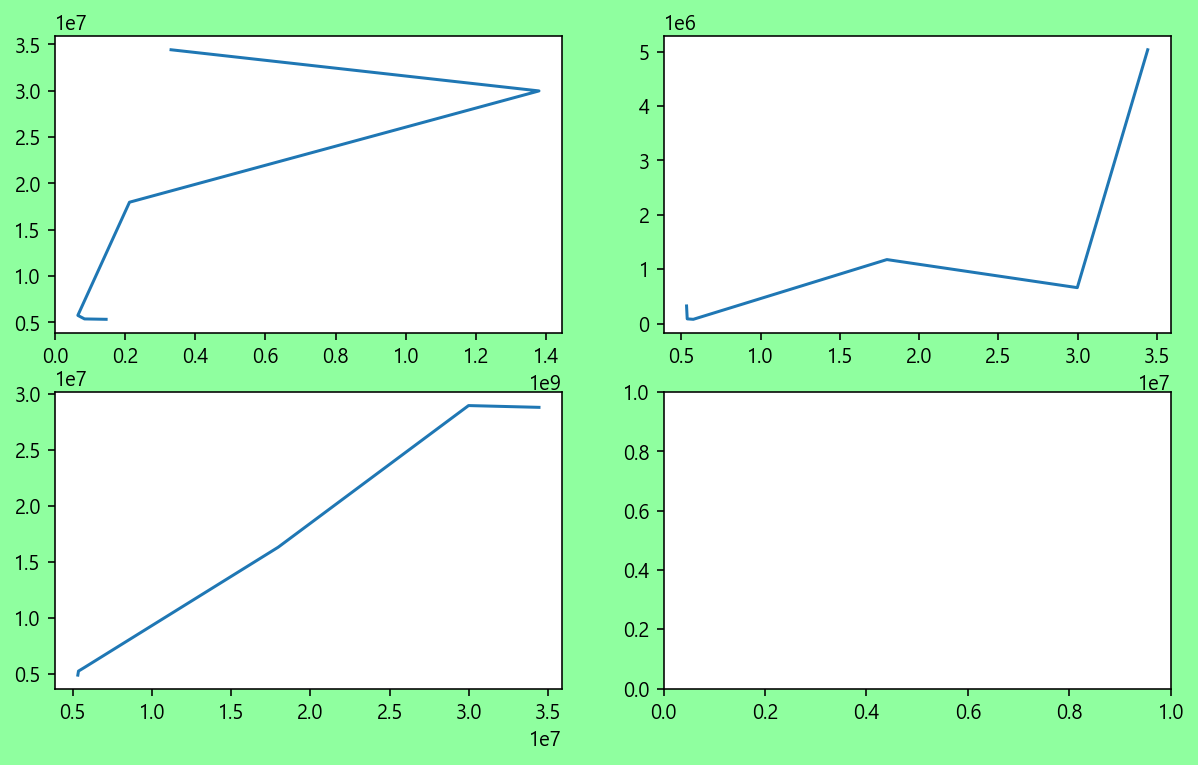

In [25]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('xkcd:mint green')

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(df3['인구수'], df3['확진자'])
axes2.plot(df3['확진자'], df3['치료중'])
axes3.plot(df3['확진자'], df3['완치'])

Text(0.5, 1.0, 'GDP')

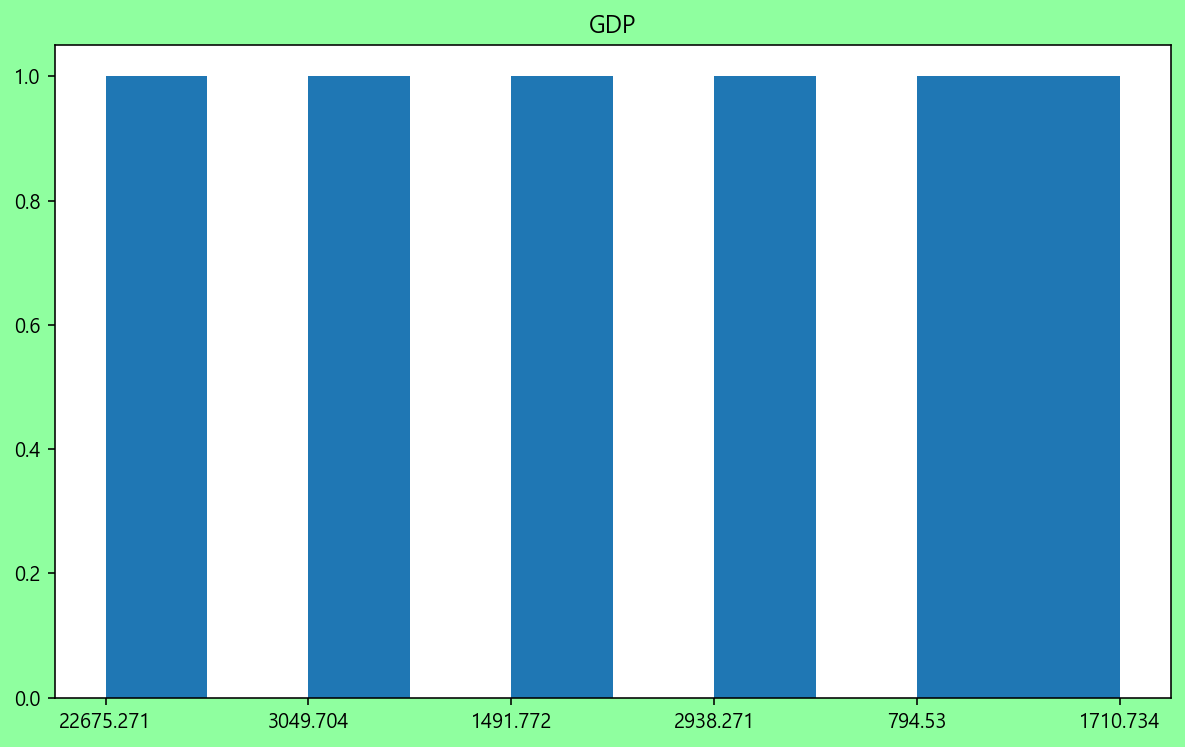

In [26]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('xkcd:mint green')

axis = fig.add_subplot(1, 1, 1)

axis.hist(df3['GDP'], bins=10)
axis.set_title('GDP')

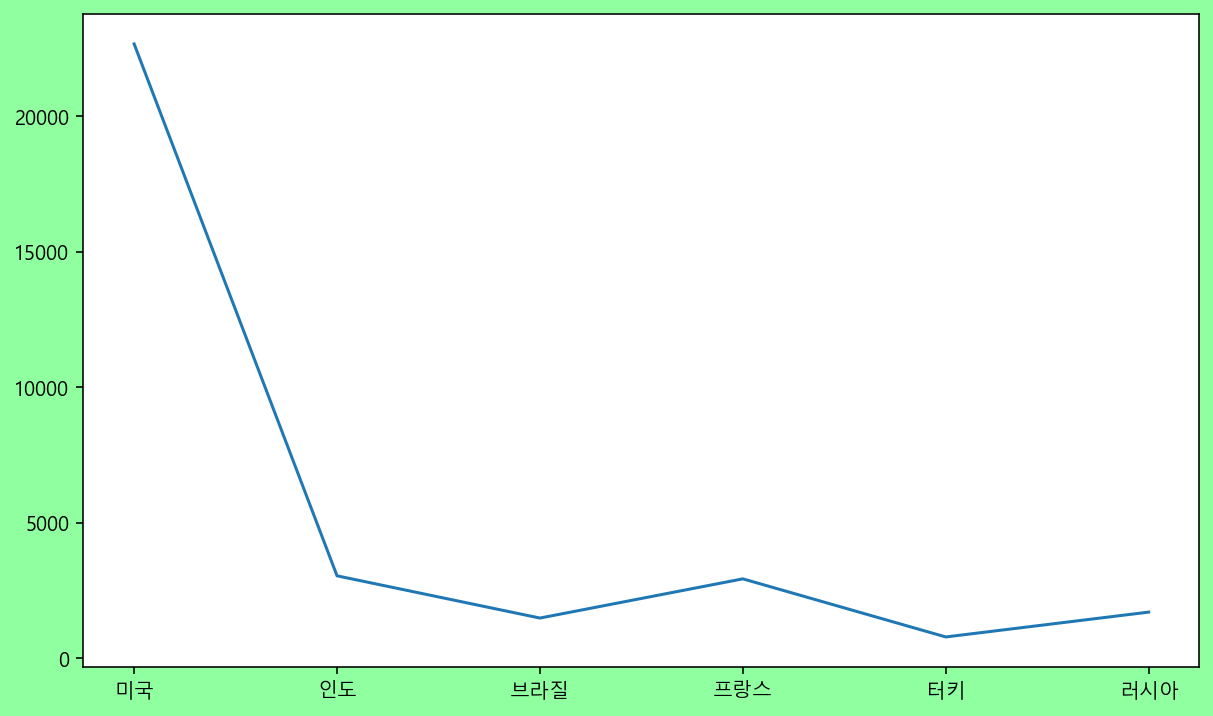

In [27]:
names = list(df3['국가'])
values = list(df3['GDP'])
values = list(map(float, values))

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('xkcd:mint green')

axis = fig.add_subplot(1, 1, 1)

axis.plot(names, values)

In [31]:
names = list(df3['국가'])
values = list(df3['GDP'])
values = list(map(float, values))
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('xkcd:white')
plt.plot(names, values, marker='x')
plt.xlabel('국가')
plt.title('< 확진자 상위 6개국 별 GDP 비교 >')
plt.xlabel('국가')
plt.ylabel('GDP [10억 달러]')

Text(0, 0.5, 'GDP [10억 달러]')